<a href="https://colab.research.google.com/github/tanish1610/Fundamental/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hand Written Digital Prediction - Classification Analysis

# Import Library

In [88]:
import pandas as pd

In [89]:
import numpy as np

In [90]:
import matplotlib.pyplot as plt

# Import Data

In [91]:
from sklearn.datasets import load_digits

In [92]:
df = load_digits()

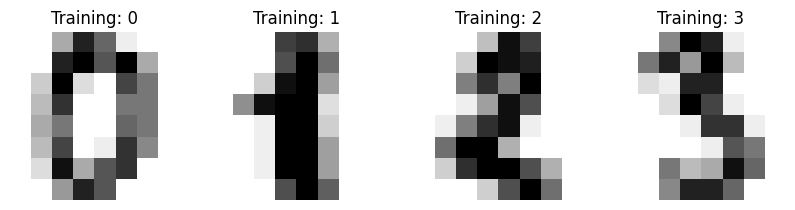

In [93]:
_, axees = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axees, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

# Data Preprocessing

Flatten Image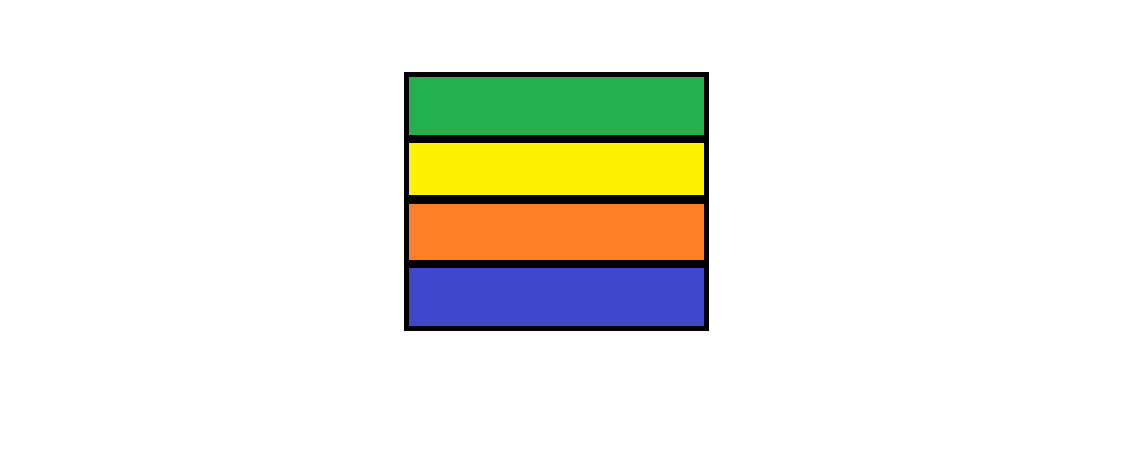

Flatten Image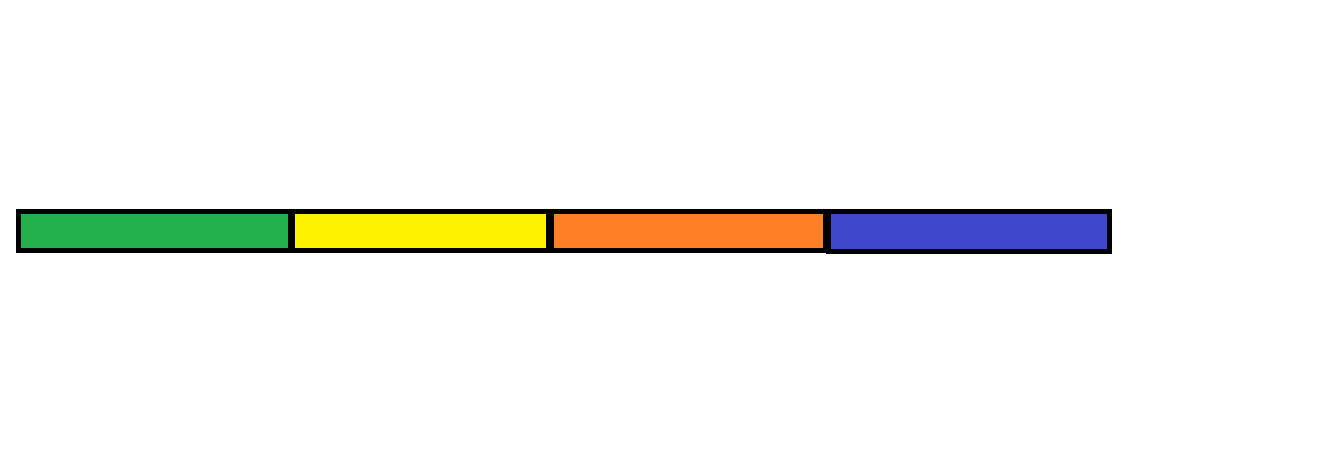

In [94]:
df.images.shape

(1797, 8, )

(1797, 8)

In [95]:
df.images[0]

np.array([[ 0.,  0.,  5.,  13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13.,  15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,   2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,   0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,   0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,   0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,   5., 10., 12.,  0.,  0.],
       [ 0.,  0., 6.,   13., 10.,  0.,  0.,  0.]])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [96]:
df.images[0].shape

(8, 8)

(8, 8)

In [97]:
len(df.images)

1797

1797

In [98]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [99]:
data[0]

np.array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [100]:
data[0].shape

(64, )

(64,)

In [101]:
data.shape

(1797, 64)

(1797, 64)

# Scaling Image Data

In [102]:
data.min()

0.0

0.0

In [103]:
data.max()

16.0

16.0

In [104]:
data = data/16

In [105]:
data.min()

0.0

0.0

In [106]:
data.max()

1.0

1.0

In [107]:
data[0]

np.array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ,])

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# Train Test Split Data

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

In [110]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

((1257, 64), (540, 64), (1257,), (540,))

# Random Forest Model

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
rf = RandomForestClassifier()

In [113]:
rf.fit(X_train, y_train)

RandomForestClassifier()

RandomForestClassifier()

# Predict Test Data

In [114]:
y_pred = rf.predict(X_test)

In [115]:
y_pred

np.array([6, 5, 2, 6, 8, 8, 2, 7, 5, 1, 1, 4, 3, 7, 2, 0, 0, 7, 0, 2, 5, 3,
       2, 5, 2, 7, 5, 9, 1, 8, 3, 3, 1, 1, 8, 4, 0, 4, 2, 1, 3, 1, 6, 9,
       8, 8, 6, 7, 5, 4, 3, 8, 5, 0, 6, 0, 7, 1, 1, 1, 6, 1, 9, 3, 8, 8,
       8, 1, 5, 0, 6, 2, 5, 9, 3, 5, 6, 0, 3, 5, 4, 0, 4, 1, 9, 1, 1, 3,
       0, 3, 7, 1, 6, 3, 9, 7, 2, 9, 6, 2, 7, 0, 6, 9, 9, 3, 5, 4, 4, 6,
       3, 6, 2, 3, 9, 6, 3, 7, 2, 7, 3, 1, 3, 6, 1, 9, 0, 5, 2, 9, 6, 1,
       3, 4, 1, 6, 7, 2, 8, 8, 2, 7, 7, 0, 7, 1, 2, 5, 0, 0, 3, 1, 5, 8,
       0, 3, 0, 1, 5, 5, 4, 8, 0, 7, 9, 5, 5, 5, 6, 4, 3, 6, 9, 3, 6, 0,
       2, 5, 9, 5, 7, 6, 4, 2, 2, 5, 7, 7, 2, 0, 8, 1, 0, 7, 6, 7, 2, 7,
       6, 6, 1, 4, 4, 7, 5, 0, 2, 9, 8, 4, 0, 0, 8, 1, 9, 4, 2, 4, 6, 1,
       0, 4, 5, 1, 6, 3, 1, 4, 8, 3, 7, 3, 3, 8, 9, 1, 2, 5, 5, 0, 7, 1,
       2, 7, 3, 0, 7, 9, 4, 7, 3, 5, 8, 1, 3, 3, 3, 6, 8, 3, 3, 6, 1, 1,
       3, 7, 8, 6, 9, 9, 6, 7, 0, 3, 9, 8, 0, 7, 9, 2, 7, 1, 5, 3, 2, 2,
       1, 4, 2, 5, 2, 0, 9, 5, 1, 2, 1, 8, 8, 3, 0, 8, 4, 2, 9, 8, 3, 2,
       6, 7, 1, 1, 4, 8, 9, 5, 1, 5, 6, 4, 0, 7, 3, 7, 4, 7, 7, 9, 5, 0,
       5, 0, 9, 2, 0, 1, 1, 9, 3, 7, 4, 7, 0, 0, 3, 9, 6, 2, 8, 8, 9, 0,
       6, 7, 1, 2, 6, 3, 9, 8, 1, 6, 9, 3, 5, 1, 6, 6, 7, 9, 1, 0, 1, 2,
       5, 2, 1, 4, 2, 8, 9, 5, 1, 7, 3, 2, 0, 9, 8, 3, 6, 4, 2, 2, 9, 1,
       2, 8, 4, 0, 4, 2, 8, 3, 8, 0, 6, 2, 0, 1, 5, 7, 6, 5, 5, 8, 6, 5,
       5, 6, 2, 5, 8, 8, 4, 7, 4, 0, 7, 0, 0, 2, 0, 8, 4, 8, 1, 6, 4, 2,
       7, 0, 4, 7, 1, 1, 1, 2, 6, 2, 8, 6, 1, 9, 1, 2, 0, 3, 6, 0, 5, 5,
       9, 7, 0, 0, 6, 3, 4, 5, 3, 9, 9, 8, 1, 2, 4, 4, 5, 4, 2, 5, 0, 6,
       9, 3, 1, 5, 0, 5, 7, 2, 2, 6, 5, 2, 4, 9, 7, 3, 8, 5, 1, 2, 0, 5,
       2, 9, 2, 3, 4, 8, 5, 7, 7, 4, 0, 0, 1, 9, 2, 1, 6, 7, 3, 8, 7, 5,
       2, 0, 5, 0, 0, 4, 8, 5, 5, 7, 9, 3])

array([6, 5, 2, 6, 8, 8, 2, 7, 5, 1, 1, 4, 3, 7, 2, 0, 0, 7, 0, 2, 5, 3,
       2, 5, 2, 7, 5, 9, 1, 8, 3, 3, 1, 1, 8, 4, 0, 4, 2, 1, 3, 1, 6, 9,
       8, 8, 6, 7, 5, 4, 3, 8, 5, 0, 6, 0, 7, 1, 1, 1, 6, 1, 9, 3, 8, 8,
       8, 1, 5, 0, 6, 2, 5, 9, 3, 5, 6, 0, 3, 5, 4, 0, 4, 1, 9, 1, 1, 3,
       0, 3, 7, 1, 6, 3, 9, 7, 2, 9, 6, 2, 7, 0, 6, 9, 9, 3, 5, 4, 4, 6,
       3, 6, 2, 3, 9, 6, 3, 7, 2, 7, 3, 1, 3, 6, 1, 9, 0, 5, 2, 9, 6, 1,
       3, 4, 1, 6, 7, 2, 8, 8, 2, 7, 7, 0, 7, 1, 2, 5, 0, 0, 3, 1, 5, 8,
       0, 3, 0, 1, 5, 5, 4, 8, 0, 7, 9, 5, 5, 5, 6, 4, 3, 6, 9, 3, 6, 0,
       2, 5, 9, 5, 7, 6, 4, 2, 2, 5, 7, 7, 2, 0, 8, 1, 0, 7, 6, 7, 2, 7,
       6, 6, 1, 4, 4, 7, 5, 0, 2, 9, 8, 4, 0, 0, 8, 1, 9, 4, 2, 4, 6, 1,
       0, 4, 5, 1, 6, 3, 1, 4, 8, 3, 7, 3, 3, 8, 9, 1, 2, 5, 5, 0, 7, 1,
       2, 7, 3, 0, 7, 9, 4, 7, 3, 5, 8, 1, 3, 3, 3, 6, 8, 3, 3, 6, 1, 1,
       3, 7, 8, 6, 9, 9, 6, 7, 0, 3, 9, 8, 0, 7, 9, 2, 7, 1, 5, 3, 2, 2,
       1, 4, 2, 5, 2, 0, 9, 5, 1, 2, 1, 8, 8, 3, 0,

# Model Accuracy

In [116]:
from sklearn.metrics import confusion_matrix, classification_report

In [117]:
confusion_matrix(y_test, y_pred)

np.array([[60,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 60,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 61,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0, 54,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 58,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0, 50,  1,  1,  1],
       [ 0,  0,  0,  0,  0,  0,  0, 52,  0,  0],
       [ 0,  2,  0,  0,  1,  1,  0,  0, 46,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 45]])

array([[60,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 60,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 61,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0, 54,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 58,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0, 50,  1,  1,  1],
       [ 0,  0,  0,  0,  0,  0,  0, 52,  0,  0],
       [ 0,  2,  0,  0,  1,  1,  0,  0, 46,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 45]])

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

           0       1.00      0.98      0.99        61
           1       0.95      0.98      0.97        61
           2       1.00      0.98      0.99        62
           3       0.98      0.98      0.98        55
           4       0.93      0.98      0.95        41
           5       0.98      0.97      0.97        60
           6       0.98      0.96      0.97        52
           7       0.95      1.00      0.97        52
           8       0.98      0.92      0.95        50
           9       0.98      0.98      0.98        46

    accuracy                           0.97       540
    macro avg       0.97      0.97      0.97       540
    weighted avg     0.97      0.97      0.97       540